In [2]:
"""
This script uses the YOLO model to perform object detection and segmentation on images.
Modules:
- ultralytics: Provides the YOLO model for object detection.
- PIL (Python Imaging Library): Used for image processing.
- matplotlib: Used for plotting images and results.
- numpy: Used for numerical operations.
- cv2 (OpenCV): Used for computer vision tasks.
- os: Provides functions to interact with the operating system.
- math: Provides mathematical functions.
- random: Used for generating random numbers.
Classes:
- None
Functions:
- None
Variables:
- data (str): Path to the dataset directory containing images.
- model (YOLO): YOLO model loaded with the specified weights.
- classNames (list): List of class names that the YOLO model can detect.
- ref_x_min (int): Minimum x-coordinate of the reference bounding box in pixels.
- ref_x_max (int): Maximum x-coordinate of the reference bounding box in pixels.
- real_length_of_reference (float): Real-world length of the reference object in centimeters.
"""
from ultralytics import YOLO
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import math
import random

# Load model
data = 'dataset/Images1/'
model = YOLO('yolo11n-seg.pt')


classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

# Reference object dimensions
ref_x_min, ref_x_max = 810, 2320  # Replace with the reference bounding box in pixels
real_length_of_reference = 5  # Example: 10 cm


In [4]:
def calculateLength(width_pixel, height_pixel):
    """
    Calculate the real-world dimensions of an object based on its pixel dimensions.
    Args:
        width_pixel (int or float): The width of the object in pixels.
        height_pixel (int or float): The height of the object in pixels.
    Returns:
        tuple: A tuple containing the real-world width and height of the object.
               (real_width, real_height)
    Note:
        This function assumes that the reference length in pixels (ref_length_pixel) and
        the real-world length of the reference (real_length_of_reference) are defined
        globally or within the scope where this function is called.
    """
    ref_length_pixel = ref_x_max - ref_x_min
    conversion_factor = real_length_of_reference / ref_length_pixel

    real_width = width_pixel * conversion_factor
    real_height = height_pixel * conversion_factor
    
    return real_width, real_height


In [5]:
"""
This script loads images from a specified folder and stores their filenames in a list.
Functions:
    None
Variables:
    img_list (list): A list to store the filenames of the images.
    num_files (int): The number of files in the 'data' folder.
Workflow:
    1. Initialize an empty list `img_list` to store image filenames.
    2. Calculate the number of files in the 'data' folder and store it in `num_files`.
    3. Iterate through the range from 1 to `num_files` (exclusive).
    4. Append each image filename (formatted as 'image{i}.jpg') to `img_list`.
    5. Print the number of files in the 'data' folder.
"""
img_list = []

# Get the number of files in the folder 'data'
num_files = len(os.listdir(data))
for i in range(1, num_files):
    img_list.append(f'image{i}.jpg')
print(f"Number of files in 'data' folder: {num_files}")

Number of files in 'data' folder: 58


In [11]:
# Initialize an empty DataFrame to store the times
df_times = pd.DataFrame(columns=['preprocess', 'inference', 'postprocess', 'total'])

for i in range(12):
    img = Image.open(data + img_list[i])
    results = model.predict(img, save=False, show_labels=False, show_conf=True, imgsz=320, conf=0.4)
    
    if 'preprocess' in results[0].speed and 'inference' in results[0].speed and 'postprocess' in results[0].speed:
        preprocess_time = results[0].speed['preprocess']
        inference_time = results[0].speed['inference']
        postprocess_time = results[0].speed['postprocess']
        total_time = preprocess_time + inference_time + postprocess_time
        
        df_times = pd.concat([df_times, pd.DataFrame([{
            'preprocess': preprocess_time,
            'inference': inference_time,
            'postprocess': postprocess_time,
            'total': total_time
        }])], ignore_index=True)

# Display the DataFrame in a readable format
print(df_times)



0: 640x480 1 orange, 198.5ms
Speed: 0.0ms preprocess, 198.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict



C:\Users\earl\AppData\Local\Temp\ipykernel_21348\1998913991.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_times = pd.concat([df_times, pd.DataFrame([{


0: 640x512 1 sports ball, 216.5ms
Speed: 16.8ms preprocess, 216.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs\segment\predict

0: 640x480 1 orange, 239.9ms
Speed: 7.7ms preprocess, 239.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict

0: 640x480 1 orange, 171.2ms
Speed: 2.5ms preprocess, 171.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict

0: 640x480 1 orange, 184.2ms
Speed: 5.1ms preprocess, 184.2ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predict

0: 480x640 1 orange, 273.3ms
Speed: 5.8ms preprocess, 273.3ms inference, 10.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict

0: 640x480 1 orange, 178.7ms
Speed: 0.0ms preprocess, 178.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\segment\predi

In [9]:
df_times['total_seconds'] = df_times['total'] / 1000
df_times

,preprocess,inference,postprocess,total,total_seconds
0,0.000000,186.769724,3.964663,190.734386,0.190734
1,6.481171,186.707020,2.012730,195.200920,0.195201
2,0.000000,130.965233,1.538992,132.504225,0.132504
3,0.000000,200.162649,0.000000,200.162649,0.200163
4,2.011299,147.205114,8.139849,157.356262,0.157356
5,0.000000,140.500069,0.000000,140.500069,0.140500
6,7.635117,98.804474,11.129856,117.569447,0.117569
7,11.145115,138.724804,10.772467,160.642385,0.160642
8,0.000000,140.187740,6.913424,147.101164,0.147101
9,2.009869,154.879332,0.000000,156.889200,0.156889


In [5]:

for r in results:
    """
    Iterates through the results and prints the class names for each detected object.

    Args:
        results (list): A list of result objects, where each result contains detected boxes.
        classNames (list): A list of class names corresponding to the detected classes.

    Each result object in the results list is expected to have an attribute 'boxes' which contains
    an attribute 'cls' that holds the class indices for the detected objects. The class indices
    are used to retrieve the corresponding class names from the classNames list.
    """
    for c in r.boxes.cls:
        print(classNames[int(c)])

orange


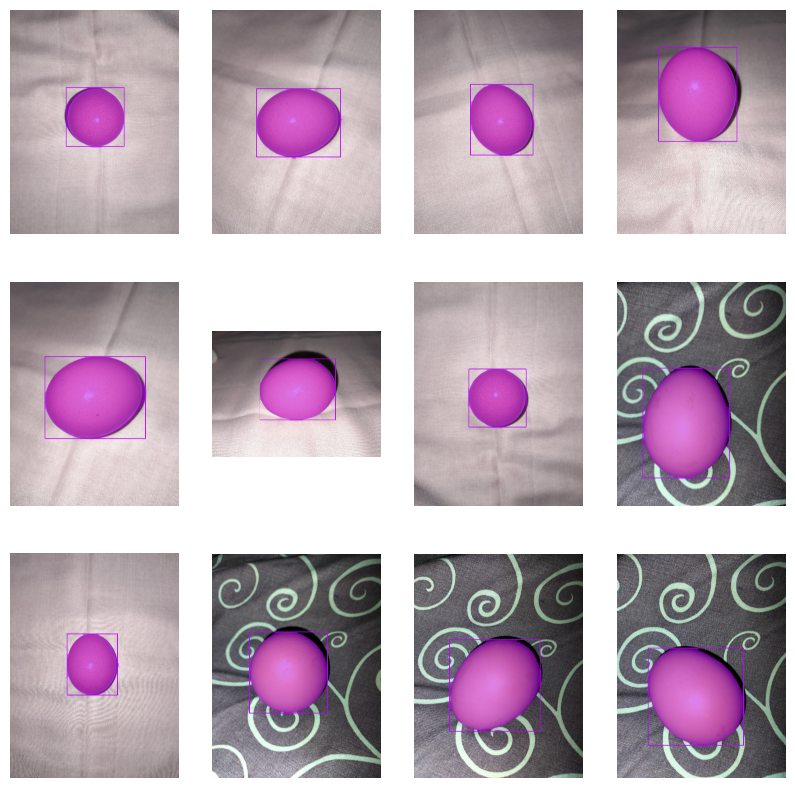

In [12]:

"""
This script visualizes a list of images in a 3x4 grid using Matplotlib.
Steps:
1. Creates a figure with a specified size of 10x10 inches.
2. Initializes an empty list to store the file paths of the images.
3. Iterates through the `img_list` and appends the file paths of the images to `result_list`.
4. Reads and displays the first 10 images from `result_list` in a 3x4 grid.
5. Converts the images from BGR to RGB color space for correct display using Matplotlib.
6. Disables the axis for each subplot to hide the tick marks and labels.
7. Displays the figure with the images.
Variables:
- `fig`: The Matplotlib figure object.
- `result_list`: A list to store the file paths of the images.
- `img_list`: A list containing the images to be processed.
- `i`: Loop variable for iterating through the images.
- `img`: The image read from the file path in `result_list`.
Note:
- Ensure that `img_list` is defined and contains the images to be processed.
- Ensure that the images exist at the specified file paths in `result_list`.
"""
fig = plt.figure(figsize=(10, 10))
result_list = []
for i in range(1, len(img_list) + 1):
    result_list.append(f'runs/segment/predict/image{i}.jpg')

for i in range(12):
    img = cv2.imread(result_list[i])
    fig.add_subplot(3, 4, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()


In [9]:
# Image Interference
"""
This script processes an image to detect objects, draw masks, centroids, bounding boxes, and display the results.
Steps:
1. Read an image from a specified path.
2. Predict objects in the image using a pre-trained model.
3. Create a black background for drawing.
4. Draw masks and centroids of detected objects on the black background.
5. Draw bounding boxes around detected objects and annotate with dimensions and coordinates.
6. Resize the resulting image for display.
7. Display the processed image in a window.
Functions:
- calculateLength(width, height): Calculates the real-world dimensions of the bounding box.
Variables:
- img_1: The input image read from the specified path.
- pred: The prediction results from the model.
- black_background: A black image of the same size as the input image for drawing.
- segmented_img: The final image with masks, centroids, and bounding boxes drawn.
- resized_img: The resized image for display.
Libraries:
- cv2: OpenCV library for image processing.
- numpy: Library for numerical operations.
"""
img_1 = cv2.imread(data + img_list[14])
pred = model.predict(img_1, save=False)

# Create a black background
black_background = np.zeros_like(img_1)

# Draw masks on the black background
for result in pred:
    for mask in result.masks.xy:
        points = np.int32([mask])
        cv2.fillPoly(black_background, points, (255, 255, 255))
        # Calculate moments of the mask
        M = cv2.moments(points)

        # Calculate centroid
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Draw the centroid on the black background
        cv2.circle(black_background, (cX, cY), 5, (0, 255, 0), 10)

# Draw bounding boxes w/ text on the black background
for result in pred:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(black_background, (x1, y1), (x2, y2), (0, 0, 255), 2)

        width = x2 - x1
        height = y2 - y1
        real_width, real_height = calculateLength(width, height)

        text1 = f"Width: {real_width:.2f} cm, Height: {real_height:.2f} cm"
        cv2.putText(black_background, text1, (x1 - 450, y1 - 450), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
        
        text2 = f"x1: {x1}, x2: {x2}"
        cv2.putText(black_background, text2, (x1, y1 - 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
        
        text3 = f"y1: {y1}, y2: {y2}"
        cv2.putText(black_background, text3, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)

# Calculate the centroid of the entire image
image_height, image_width = img_1.shape[:2]
image_cX, image_cY = image_width // 2, image_height // 2

# Add text with the centroid of the picture
centroid_text = f"Centroid: ({image_cX}, {image_cY})"
cv2.putText(black_background, centroid_text, (image_cX - 100, image_cY), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)

segmented_img = black_background

# Resize the image for display
scale_percent = 20  # percent of original size
width = int(segmented_img.shape[1] * scale_percent / 100)
height = int(segmented_img.shape[0] * scale_percent / 100)
dim = (width, height)
resized_img = cv2.resize(segmented_img, dim, interpolation=cv2.INTER_AREA)

# Display the segmented image
cv2.imshow('Segmented Image', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


0: 640x480 1 orange, 312.5ms
Speed: 7.3ms preprocess, 312.5ms inference, 16.7ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:

# Real Time interfence
"""
Real-time object detection and size estimation using OpenCV and a pre-trained model.
This script captures video from the webcam, performs object detection using a pre-trained model,
and draws bounding boxes around detected objects. It also calculates and displays the real-world
dimensions of the detected objects.
Functions:
    calculateLength(width, height): Calculates the real-world dimensions of the detected object.
Variables:
    cap: Video capture object for the webcam.
    ret: Boolean indicating if the frame was read successfully.
    img: The current frame captured from the webcam.
    res: The result of the model prediction on the current frame.
    x1, y1, x2, y2: Coordinates of the bounding box.
    width: Width of the bounding box.
    height: Height of the bounding box.
    classtext: The class name of the detected object.
    real_width: Real-world width of the detected object.
    real_height: Real-world height of the detected object.
    text1: Text displaying the real-world dimensions of the detected object.
Usage:
    Run the script to start the webcam and perform real-time object detection and size estimation.
    Press 'q' to quit the application.
"""
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while True:
    ret, img = cap.read()
    res = model.predict(img, stream=True, conf=0.5)

    # Draw bounding boxes on the image
    for result in res:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            width = x2 - x1
            height = y2 - y1
            for c in result.boxes.cls:
                classtext = (classNames[int(c)])

            cv2.putText(img, classtext, (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            real_width, real_height = calculateLength(width, height)
            text1 = f"Width: {real_width:.2f} cm, Height: {real_height:.2f} cm"
            cv2.putText(img, text1, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.imshow('Webcam', img)
    
cap.release()
cv2.destroyAllWindows()